In [1]:
!pip install plotly

In [2]:
!pip install stopwords
!pip install flair
!pip install nltk
!pip install swifter

     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
      --------------------------------------- 0.0/1.2 MB 162.5 kB/s eta 0:00:08
     - -------------------------------------- 0.0/1.2 MB 245.8 kB/s eta 0:00:05
     ---------------- ----------------------- 0.5/1.2 MB 2.8 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16514 sha256=a90f3cd7b83b3127eae966d61f5e9942ec5718a633d8dce7c11caf51a5014ac2
  Stored in directory: c:\users\prachi tewari\appdata\local\pip\cache\wheels\d9\31\ff\ff51141a088571a9f672449e5aad5ea8bb35ca5d95ba135f30
Successfully built swifter


In [4]:
!pip install wordcloud
!pip install seaborn

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ---------- ---------------------------- 81.9/301.4 kB 919.0 kB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.3 MB/s eta 0:00:00


In [3]:
!pip install collections 
!pip install PIL

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [5]:
import nltk
nltk.download('punkt')        # Tokenizers
nltk.download('stopwords')    # Stopwords
nltk.download('wordnet')      # WordNet
nltk.download('averaged_perceptron_tagger')  # Part-of-speech tagger

[nltk_data] Downloading package punkt to C:\Users\PRACHI
[nltk_data]     TEWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\PRACHI
[nltk_data]     TEWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\PRACHI
[nltk_data]     TEWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PRACHI TEWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
import nltk
import pandas as pd
import numpy as np
#from flair.data import Sentence
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
pd.options.display.max_rows = None

In [6]:
#Import Amazon Product Reviews Dataset and Basic Cleaning
df = pd.read_csv("C:\\Users\\PRACHI TEWARI\\Desktop\\LG-Soft\\Reviews.csv", encoding='utf-8')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
#Missing Value Handling

df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)
print(df.isnull().sum().sum())

0


In [12]:
#Duplicate Values Handling
df=df.drop_duplicates(keep='first')

In [13]:
#amount of scoring of each review 
df.Score.value_counts()

Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64

In [16]:
#Classify score values to sentiment
#for score values above 3- classify them to positive sentiment
#for score values below 3 we classify them into negative sentiment

def score_round(x):
    if x>=3:
        return 1
    else:
        return 0

In [18]:
df["Score_New"]=df["Score"].apply(score_round)

In [20]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score_New
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [22]:
df.Score_New.value_counts()

Score_New
1    486394
0     82007
Name: count, dtype: int64

In [24]:
#Data is highly imbalanced between class 1 and class 0

review=df.copy()

In [26]:
review.shape

(568401, 11)

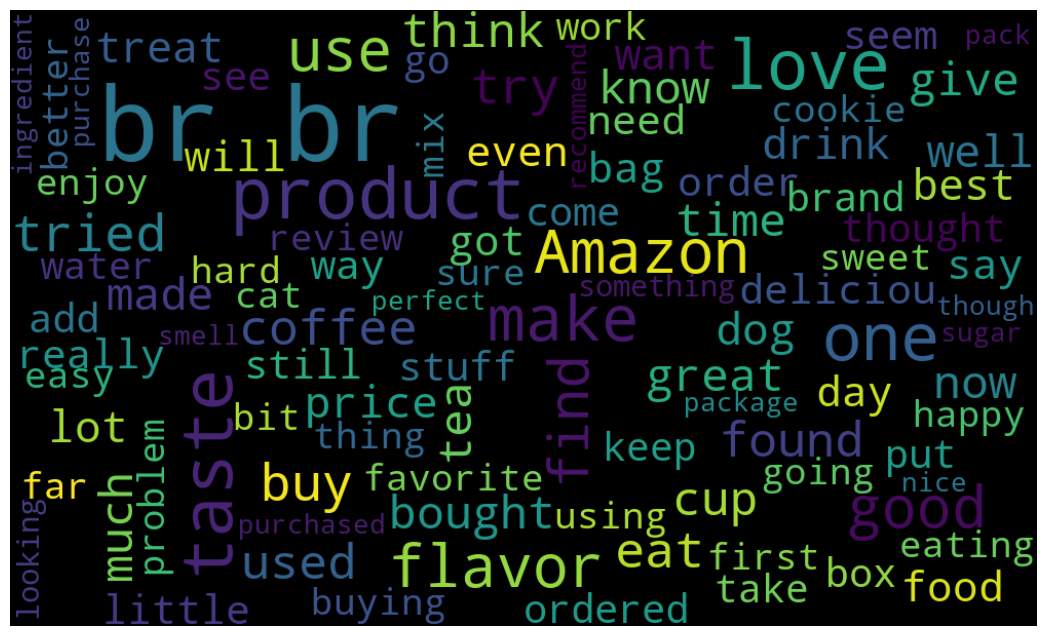

In [34]:
#Analysis and Visualization

#1 Wordclouds for all text
txt=" ".join(rev for rev in review.Text)
plt.figure(figsize=(15,8))

wordcloud=WordCloud(
    background_color='black',
    max_font_size=100,
    max_words=100,
    width=1000,
    height=600
).generate(txt)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

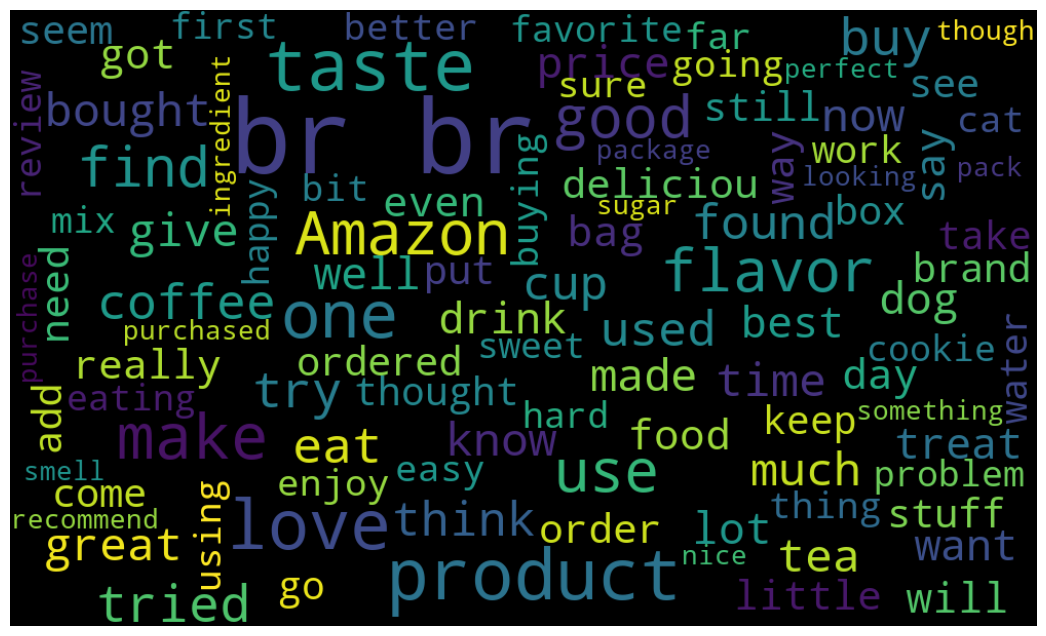

In [24]:
#1.1 Wordclouds for all Summary Reviews
txt=" ".join(rev for rev in review.Text)
plt.figure(figsize=(15,8))

wordcloud=WordCloud(
    background_color='black',
    max_font_size=100,
    max_words=100,
    width=1000,
    height=600
).generate(txt)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
#2.1 WordClouds for each positive sentiment reviews

review_positive=review[review["Score_New"]==1]

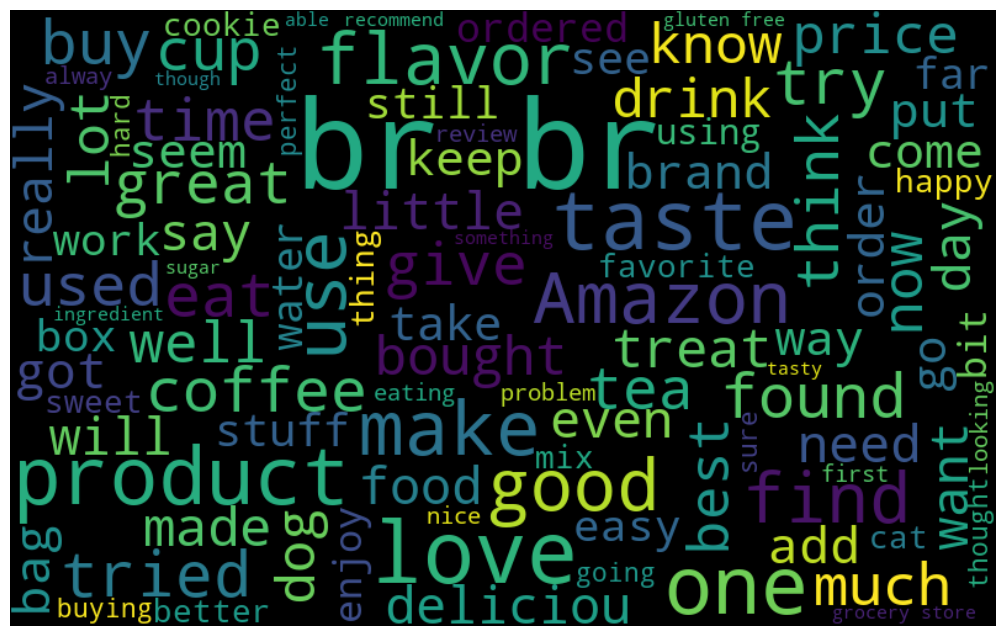

In [26]:
txt = ' '.join(rev for rev in review_positive.Text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

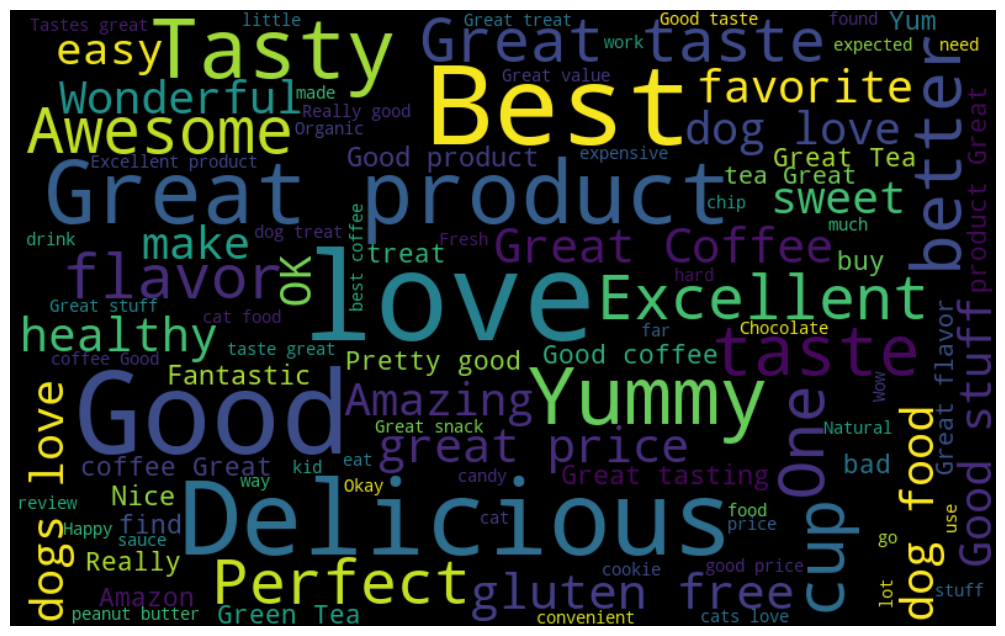

In [27]:
txt = ' '.join(rev for rev in review_positive.Summary)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [20]:
#2.2 WordClouds for each negative sentiment reviews
review_negative = review[review['Score_New']==0]

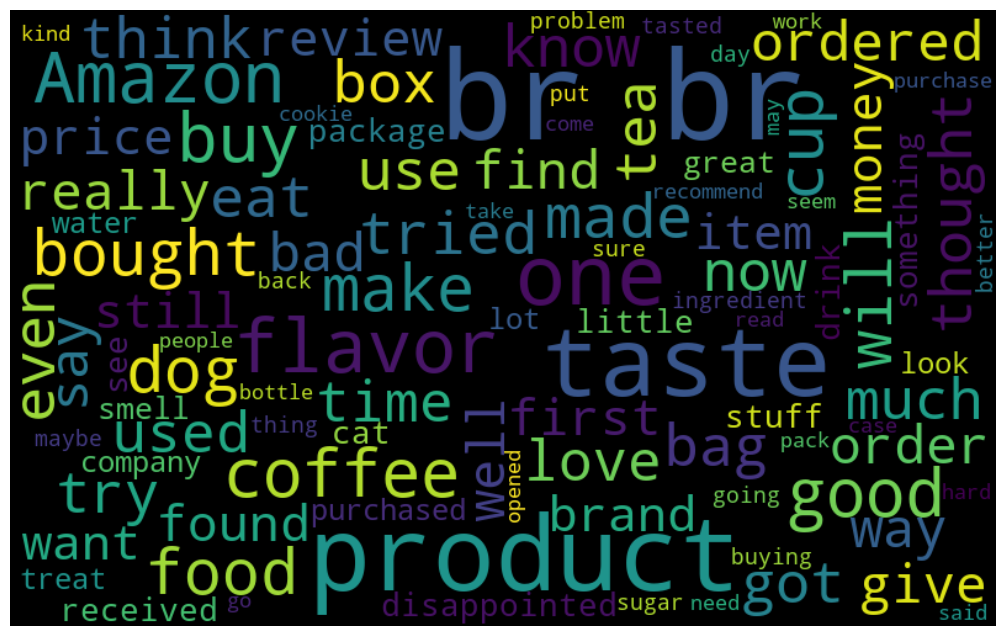

In [29]:
txt = ' '.join(rev for rev in review_negative.Text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

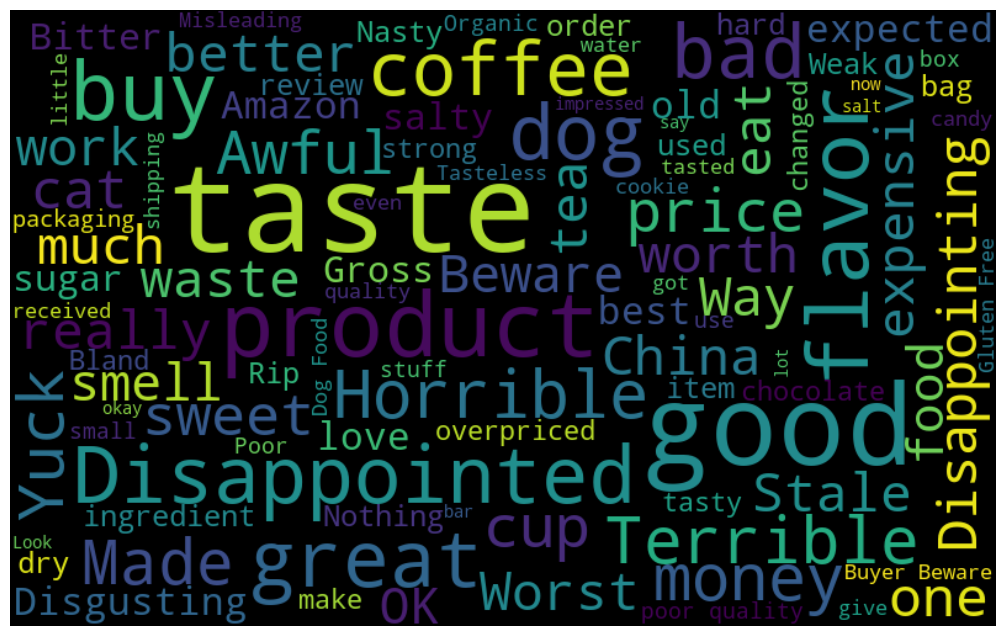

In [30]:
txt = ' '.join(rev for rev in review_negative.Summary)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [36]:
#3 Distribution of Sentiment Reviews
review_vis=review.copy()
review_vis["Score_New"]=review_vis["Score_New"].replace({0:"negative"})
review_vis["Score_New"]=review_vis["Score_New"].replace({1:"positive"})

In [38]:
temp=review_vis.groupby("Score_New").count()["Summary"].reset_index().sort_values(
    by='Summary',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Score_New,Summary
1,positive,486394
0,negative,82007


<Axes: xlabel='Score_New', ylabel='count'>

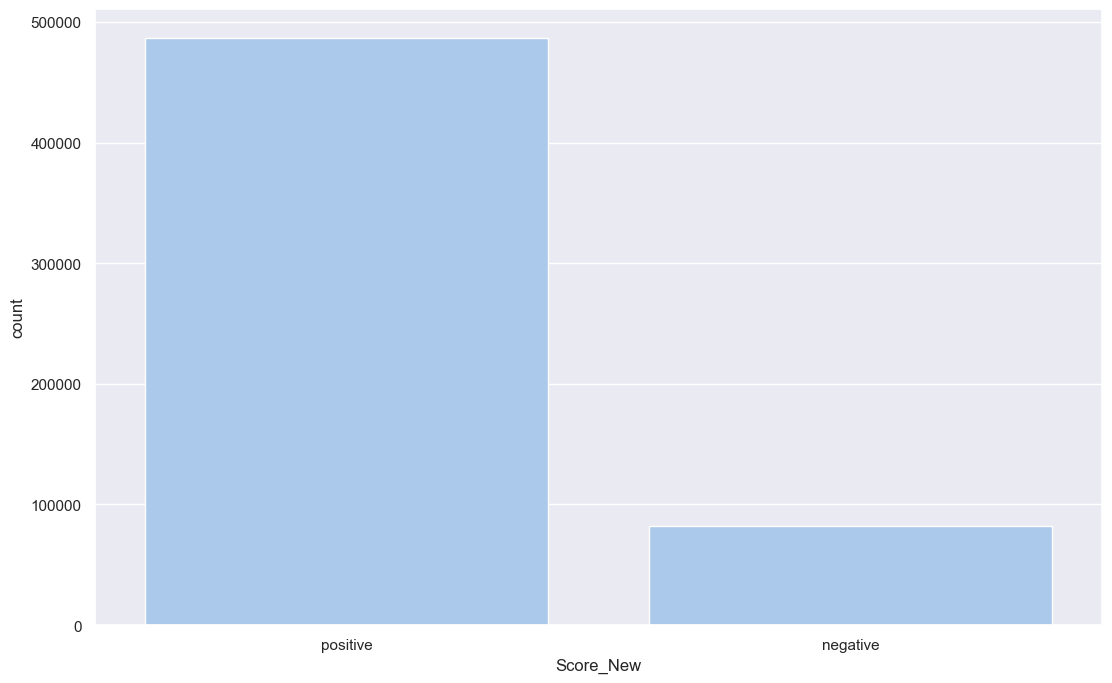

In [40]:
#Plotting
sns.set_theme(style='whitegrid')
sns.set(rc={"figure.figsize":(13,8)})
sns.set_palette("pastel")
sns.countplot(x='Score_New',data=review_vis)

In [28]:
#Data Cleaning for sentiment analysis 
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\PRACHI
[nltk_data]     TEWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#We make functions to clean some basic characters

#Remove hyperlinks and markup
def clean(raw):
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

In [32]:
#To remove numeric
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

In [34]:
#To clean and remove emoji if any
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [36]:
#Clean unecessary whitespaces
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [38]:
#To clean and remove symbols
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string 

In [40]:
#To remove punctuation
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

In [42]:
#To remove stopwirds
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

In [44]:
#To use stemming to normalize words
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

In [46]:
#Combining all cleaning functions
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(Stemming)

In [48]:
def process_text(text):
    text = clean(text)
    text = deEmojify(text)
    text = text.lower()
    text = remove_num(text)
    text = remove_symbols(text)
    text = remove_punctuation(text)
    text = remove_stopword(text)
    text = unify_whitespaces(text)
    text = Stemming(text)
    return text

In [64]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def cleaning(df, review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(Stemming)
    

[nltk_data] Downloading package punkt to C:\Users\PRACHI
[nltk_data]     TEWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\PRACHI
[nltk_data]     TEWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
def clean_text(df, column):
    # Combining all cleaning steps into one vectorized function
    df[column] = df[column].str.replace("<[a][^>]*>(.+?)</[a]>", 'Link.', regex=True)
    df[column] = df[column].str.replace('&gt;', "", regex=False)
    df[column] = df[column].str.replace('&#x27;', "'", regex=False)
    df[column] = df[column].str.replace('&quot;', '"', regex=False)
    df[column] = df[column].str.replace('&#x2F;', ' ', regex=False)
    df[column] = df[column].str.replace('<p>', ' ', regex=False)
    df[column] = df[column].str.replace('</i>', '', regex=False)
    df[column] = df[column].str.replace('&#62;', '', regex=False)
    df[column] = df[column].str.replace('<i>', ' ', regex=False)
    df[column] = df[column].str.replace("\n", '', regex=False)
    df[column] = df[column].str.replace(r'\d+', '', regex=True)
    df[column] = df[column].str.replace(r"[^a-zA-Z0-9?!.,]+", ' ', regex=True)
    df[column] = df[column].str.replace(' +', ' ', regex=True)
    df[column] = df[column].str.lower()
    return df

review = clean_text(review, 'Text')
review = clean_text(review, 'Summary')

In [54]:
!pip install swifter

In [56]:
import swifter

review["Text"] = review["Text"].swifter.apply(remove_stopword)
review["Summary"] = review["Summary"].swifter.apply(remove_stopword)

Pandas Apply:   0%|          | 0/568401 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/568401 [00:00<?, ?it/s]

In [58]:
import pandas as pd
import swifter

# Create a dummy DataFrame
df = pd.DataFrame({'Text': ['Sample text 1', 'Sample text 2', 'Sample text 3']})

# Apply a simple function using swifter
df['Processed_Text'] = df['Text'].swifter.apply(lambda x: x.lower())

print(df)


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

            Text Processed_Text
0  Sample text 1  sample text 1
1  Sample text 2  sample text 2
2  Sample text 3  sample text 3


In [60]:
from multiprocessing import Pool
def cleaning(df, review_col):
    with Pool() as pool:
        df[review_col] = pool.map(process_text, df[review_col])

In [62]:
review['Text'][0]

'bought several vitality canned dog food products found good quality. product looks like stew processed meat smells better. labrador finicky appreciates product better most.'

In [64]:
#we have cleaned the review summary and etxts
review_vis2=review.copy()

In [66]:
review_vis2['temp_list']=review_vis2['Text'].apply(lambda x:str(x).split())
top=Counter([item for sublist in review_vis2['temp_list'] for item in sublist])
temp=pd.DataFrame(top.most_common(20))
temp.columns=['Common_words','Count']
temp.style.background_gradient(cmap='Blues')

,Common_words,Count
0,br,647107
1,like,247334
2,one,158466
3,good,152539
4,great,134327
5,taste,132048
6,.,124646
7,would,123067
8,love,122840
9,coffee,119148


In [70]:
temp

,Common_words,Count
0,br,647107
1,like,247334
2,one,158466
3,good,152539
4,great,134327
5,taste,132048
6,.,124646
7,would,123067
8,love,122840
9,coffee,119148


<Axes: xlabel='Count', ylabel='Common_words'>

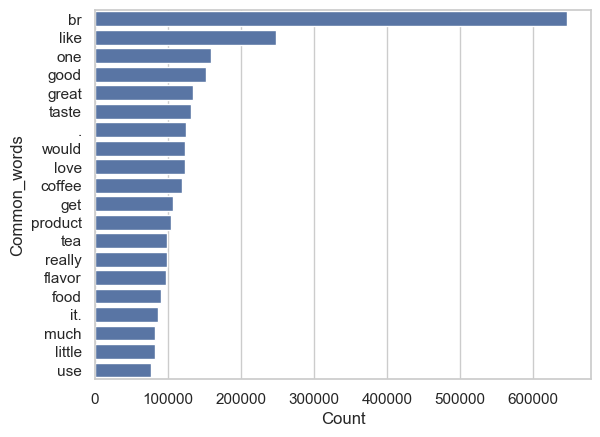

In [72]:
sns.set_theme(style="whitegrid")
sns.barplot(x="Count", y="Common_words", data=temp)

In [76]:
#Bag of words using vectorizer
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score_New
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,bought several vitality canned dog food produc...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,advertised,product arrived labeled jumbo salted peanuts.....,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,delight says,"confection around centuries. light, pillowy ci...",1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,looking secret ingredient robitussin believe f...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy great price. wide assortment yummy...,1


In [86]:
#split data to training and testing data

#random split train and test

import numpy as np
import pandas as pd

# Assuming 'review' is your DataFrame
index = review.index
review['random_number'] = np.random.randn(len(index))

# Splitting data into training and testing sets
train = review[review['random_number'] <= 0.8]
test = review[review['random_number'] > 0.8]

# Dropping the temporary column used for random split
review.drop(columns=['random_number'], inplace=True)

# Verify lengths
print("Training set length:", len(train))
print("Testing set length:", len(test))


Training set length: 447883
Testing set length: 120518


In [92]:
train.shape

(447883, 12)

In [94]:
test.shape

(120518, 12)

In [96]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [98]:
X_train = train_matrix
X_test = test_matrix
y_train = train['Score_New']
y_test = test['Score_New']

In [100]:
#Machine Learning Modelling

#Logistic Regression 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [102]:
lr.fit(X_train,y_train)

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
predictions = lr.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [110]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,roc_auc_score
new = np.asarray(y_test)
confusion_matrix(y_test,predictions)

array([[  8629,   8619],
       [  2332, 100938]], dtype=int64)

In [112]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('Confusion Matrix: \n',classification_report(y_test,ypred,labels=[0,1]))
    print("\n")
    print('TN - True Negative {}'.format(cfmat[1,1]))
    print('FP - False Positive {}'.format(cfmat[1,0]))
    print('FN - False Negative {}'.format(cfmat[0,1]))
    print('TP - True Positive {}'.format(cfmat[0,0]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, ypred,average='macro')))
    print('ROC-AUC {}'.format(roc_auc_score(y_test,ypred)))

In [114]:
Confusion_Matrix(y_test,predictions)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.79      0.50      0.61     17248
           1       0.92      0.98      0.95    103270

    accuracy                           0.91    120518
   macro avg       0.85      0.74      0.78    120518
weighted avg       0.90      0.91      0.90    120518



TN - True Negative 100938
FP - False Positive 2332
FN - False Negative 8619
TP - True Positive 8629
Accuracy Rate: 0.9091339053087506
Misclassification Rate: 0.09086609469124944
F1-Score: 0.7801678128584967
ROC-AUC 0.7388541532113254
